# Machine Learning with SK-Learn

In [1]:
import sklearn
sklearn.__version__

'0.22.2.post1'

Chapter 2: simple linear reggression

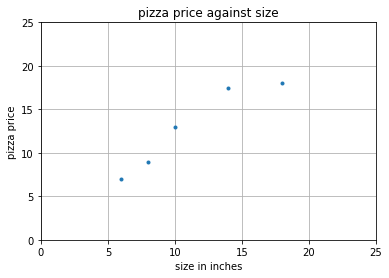

In [38]:
from numpy import *
import matplotlib.pyplot as plt

x=array([[6],[8],[10],[14],[18]]).reshape(-1,1)
y=[7,9,13,17.5,18]

plt.figure()
plt.title("pizza price against size")
plt.xlabel('size in inches')
plt.ylabel('pizza price')
plt.plot(x,y,'.') #using dot style, not curve.
plt.axis([0,25,0,25])
plt.grid(True)
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
fit_model=model.fit(x,y)

test=array([[12]])
predict_price=model.predict(test)[0]
print("the "+str(test[0][0])+" inches pizza costs "+str(predict_price)+" dollars.")
print("the residual sum of squares is: %.3f."%(mean((model.predict(x)-y)**2)))

the 12 inches pizza costs 13.681034482758621 dollars.
the residual sum of squares is: 1.750.


In [13]:
fit_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
array([[0]])[0][0]

0

In [24]:
model.predict(x)-y

array([ 0.82327586,  0.77586207, -1.27155172, -1.86637931,  1.5387931 ])

In [25]:
(model.predict(x)-y)**2

array([0.67778315, 0.60196195, 1.61684379, 3.48337173, 2.36788422])

In [36]:
x1=array([[6],[8],[10],[14],[18]])
x1_bar=x1.mean()
print(x1_bar)
variance=sum((x1-x1_bar)**2)/(x1.shape[0]-1) #using shape[0], not shape()[0].
print(variance)

11.2
23.2


In [37]:
print(var(x1,ddof=1)) #var() is a numpy function.

23.2


In [52]:
y1=array([7,9,13,17.,18])
y1_bar=mean(y1)
covariance=sum(multiply((x1-x1_bar).T,y1-y1_bar))/(x1.shape[0]-1)
print(covariance)
print(cov(x1.T,y1)) #cov() is a built in numpy function.

22.3
[[23.2 22.3]
 [22.3 23.2]]


In [53]:
sum((x1-x1_bar).T*(y1-y1_bar))/(x1.shape[0]-1)

22.3

In [57]:
from sklearn.linear_model import LinearRegression

x_train=array([6,8,10,14,18]).reshape(-1,1)
y_train=[7,9,13,17.5,18]

x_test=array([8,9,11,16,12]).reshape(-1,1)
y_test=[11,8.8,15,18,11]

model=LinearRegression()
model.fit(x_train,y_train)
r_squared=model.score(x_test,y_test)
print("%.3f"%(r_squared))

0.670


Chapter 3: K Nearest Neighnors

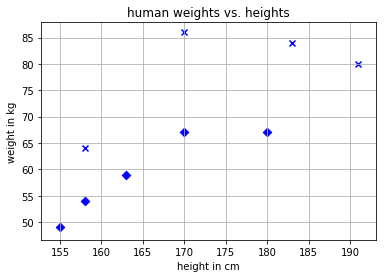

In [12]:
from numpy import *
import matplotlib.pyplot as plt

x_train=array([[158,64],
              [170,86],
              [183,84],
              [191,80],
              [155,49],
              [163,59],
              [180,67],
              [158,54],
              [170,67]])
y_train=['male','male','male','male','female','female','female','female','female']

plt.figure()
plt.title("human weights vs. heights")
plt.xlabel("height in cm")
plt.ylabel("weight in kg")
for i,x in enumerate(x_train): #using enumerate to return index and each row in x_train.
    plt.scatter(x[0],x[1],c='b',marker='x' if y_train[i]=='male' else 'D') #advanced method of plotting.
plt.grid(True)
plt.show()

In [20]:
x=array([[155,70]])
distance=sqrt(sum((x_train-x)**2,axis=1))
print(distance)
nearest_neighbor_index=distance.argsort()[:3] #order the distance ascently and return the first 3 indices.
nearest_neighbor_genders=take(y_train,nearest_neighbor_index) #take out the cooresponding data from y_train.
print(nearest_neighbor_genders)

from collections import Counter
b=Counter(nearest_neighbor_genders) #counting frequency of each element.
b.most_common(1)[0][0] #selecting the first most common data.

[ 6.70820393 21.9317122  31.30495168 37.36308338 21.         13.60147051
 25.17935662 16.2788206  15.29705854]
['male' 'female' 'female']


'female'

In [36]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

lb=LabelBinarizer()
y_train_binarized=lb.fit_transform(y_train)
print(y_train_binarized)

k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train_binarized.reshape(-1))
prediction_binarized=knn.predict(array([155,70]).reshape(1,-1))[0]
predicted_label=lb.inverse_transform(prediction_binarized)
print(predicted_label)

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
['female']


In [23]:
y_train_binarized.reshape(-1)

array([1, 1, 1, 1, 0, 0, 0, 0, 0])

In [34]:
array([155,70])

array([155,  70])

In [30]:
knn.predict(array([155,70]).reshape(1,-1))[0]

0

In [44]:
x_test=array([
    [168,65],
    [180,96],
    [160,52],
    [169,67]
])
y_test=['male','male','female','female']
y_test_binarized=lb.transform(y_test)
print("binarized labels: %s"%(y_test_binarized.T[0]))
prediction_binarized=knn.predict(x_test)
print("binarized predictions: %s"%(prediction_binarized))
print("predicted labels: %s"%(lb.inverse_transform(prediction_binarized)))

binarized labels: [1 1 0 0]
binarized predictions: [0 1 0 0]
predicted labels: ['female' 'male' 'female' 'female']


In [43]:
y_test_binarized.T[0]

array([1, 1, 0, 0])

In [46]:
from sklearn.metrics import accuracy_score

acc_sco=accuracy_score(y_test_binarized,prediction_binarized)
print("the accuracy of this model is: %s"%(acc_sco))

the accuracy of this model is: 0.75


In [47]:
from sklearn.metrics import precision_score

pre_sco=precision_score(y_test_binarized,prediction_binarized)
print("the precision of this model is: %s"%(pre_sco))

the precision of this model is: 1.0


In [48]:
from sklearn.metrics import recall_score

rec_sco=recall_score(y_test_binarized,prediction_binarized)
print("the recall rate of this model is: %s"%(rec_sco))

the recall rate of this model is: 0.5


In [49]:
from sklearn.metrics import f1_score

f1_sco=f1_score(y_test_binarized,prediction_binarized)
print("the f1 score of this model is: %s"%(f1_sco))

the f1 score of this model is: 0.6666666666666666


In [50]:
from sklearn.metrics import matthews_corrcoef

mat_cor=matthews_corrcoef(y_test_binarized,prediction_binarized)
print("the matthews correlation coefficient is: %s"%(mat_cor))

the matthews correlation coefficient is: 0.5773502691896258


In [52]:
from sklearn.metrics import classification_report

print(
classification_report(y_test_binarized,prediction_binarized,target_names=['male','female'],labels=[1,0]))

              precision    recall  f1-score   support

        male       1.00      0.50      0.67         2
      female       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [54]:
from numpy import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

x_train=array([
    [158,1],
    [170,1],
    [183,1],
    [191,1],
    [155,0],
    [163,0],
    [180,0],
    [158,0],
    [170,0]
])
y_train=[64,86,84,80,49,59,67,54,67]

x_test=array([
    [168,1],
    [180,1],
    [160,0],
    [169,0]
])
y_test=[65,96,52,67]

k=3
clf=KNeighborsRegressor(n_neighbors=k)
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)
print("predicted weights: %s"%(predictions))
print("coefficient of detemination: %s"%(r2_score(y_test,predictions)))
print("mean absolute error: %s"%(mean_absolute_error(y_test,predictions)))
print("mean squared error: %s"%(mean_squared_error(y_test,predictions)))

predicted weights: [70.66666667 79.         59.         70.66666667]
coefficient of detemination: 0.6290565226735438
mean absolute error: 8.333333333333336
mean squared error: 95.8888888888889


In [57]:
from scipy.spatial.distance import euclidean

x_train1=array([
    [1600,0],
    [1700,1]
])
x_test1=array([1640,1]).reshape(1,-1)
print(euclidean(x_train1[0,:],x_test1))
print(euclidean(x_train1[1,:],x_test1))

x_train2=array([
    [1.6,0],
    [1.7,1]
])
x_test2=array([1.64]).reshape(1,-1)
print(euclidean(x_train2[0,:],x_test2))
print(euclidean(x_train2[1,:],x_test2))

40.01249804748511
60.0
1.6404877323527902
0.6428063471995278


In [62]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
print(x_train)
print(x_train_scaled)

x_test_scaled=ss.transform(x_test)
clf.fit(x_train_scaled,y_train)
predictions=clf.predict(x_test_scaled)
print("predicted weights: %s"%(predictions))
print("coefficient of determination: %s"%(r2_score(y_test,predictions)))
print("mean absolute error: %s"%(mean_absolute_error(y_test,predictions)))
print("mean squared error: %s"%(mean_squared_error(y_test,predictions)))

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
[[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]
predicted weights: [78.         83.33333333 54.         64.33333333]
coefficient of determination: 0.6706425961745109
mean absolute error: 7.583333333333336
mean squared error: 85.13888888888893


In [63]:
ss.transform(x_train)

array([[-0.9908706 ,  1.11803399],
       [ 0.01869567,  1.11803399],
       [ 1.11239246,  1.11803399],
       [ 1.78543664,  1.11803399],
       [-1.24326216, -0.89442719],
       [-0.57021798, -0.89442719],
       [ 0.86000089, -0.89442719],
       [-0.9908706 , -0.89442719],
       [ 0.01869567, -0.89442719]])

Chapter 4: Feature Extraction

In [68]:
from sklearn.feature_extraction import DictVectorizer

one_hot_encoder=DictVectorizer()
x=[
    {'city':'New York'},
    {'city':'San Francisco'},
    {'city':'Chapel Hill'}
]
print(one_hot_encoder.fit_transform(x).toarray()) #turn x into a array.

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [72]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

x=array([
    [0,0,5,13,9,1],
    [0,0,13,15,10,15],
    [0,3,15,2,0,11]
])
print(preprocessing.scale(x))
print(RobustScaler().fit_transform(x))

[[ 0.         -0.70710678 -1.38873015  0.52489066  0.59299945 -1.35873244]
 [ 0.         -0.70710678  0.46291005  0.87481777  0.81537425  1.01904933]
 [ 0.          1.41421356  0.9258201  -1.39970842 -1.4083737   0.33968311]]
[[ 0.          0.         -1.6         0.          0.         -1.42857143]
 [ 0.          0.          0.          0.30769231  0.2         0.57142857]
 [ 0.          2.          0.4        -1.69230769 -1.8         0.        ]]


In [74]:
corpus=[
    'UNC played Duke in basketball',
    'Duke lost the basketball game'
]

from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer() #only extract the string whose length equals to or is greater than 2.
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[1 1 0 1 0 1 0 1]
 [1 1 1 0 1 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 1, 'in': 3, 'basketball': 0, 'lost': 4, 'the': 6, 'game': 2}


In [75]:
corpus.append('I ate a sandwich')
print(vectorizer.fit_transform(corpus).todense()) #todense() returns a matrix while toarray() returns an array.
print(vectorizer.vocabulary_) #show the vocabulary of corpus.

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{'unc': 9, 'played': 6, 'duke': 2, 'in': 4, 'basketball': 1, 'lost': 5, 'the': 8, 'game': 3, 'ate': 0, 'sandwich': 7}


In [79]:
from sklearn.metrics.pairwise import euclidean_distances

x=vectorizer.fit_transform(corpus).todense()
print("the distance between the 1st and the 2nd vectors is: %.3f."%(euclidean_distances(x[0],x[1])))
print("the distance between the 2nd and the 3rd vectors is: %.3f."%(euclidean_distances(x[1],x[2])))
print("the distance between the 3rd and the 1st vectors is: %.3f."%(euclidean_distances(x[2],x[0])))

the distance between the 1st and the 2nd vectors is: 2.449.
the distance between the 2nd and the 3rd vectors is: 2.646.
the distance between the 3rd and the 1st vectors is: 2.646.


In [81]:
#filter the stoped words in english language thus reducing dementionality.
vectorizer_new=CountVectorizer(stop_words='english')
print(vectorizer_new.fit_transform(corpus).todense())
print(vectorizer_new.vocabulary_)

[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 2, 'basketball': 1, 'lost': 4, 'game': 3, 'ate': 0, 'sandwich': 6}


In [13]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()
print(lemmatizer.lemmatize('gathering','v'))
print(lemmatizer.lemmatize('gathering','n'))

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/home/stevenxu/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 111]
[nltk_data]     Connection refused>


False

In [7]:
a=[1,2,3,4,5,6]
a.count('1')

0

In [2]:
import nltk

In [23]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
print(stemmer.stem('gathering'))

gather


In [45]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

wordnet_tags=['v','n']
corpus=[
    'He ate the sandwiches',
    'Every sandwiches was eaten by him'
]
stemmer=PorterStemmer()
print("stemmed:",[[stemmer.stem(token) for token in word_tokenize(document)] for document in corpus])

def lemmatize(token,tag):
    if tag[0].lower() in ['n','v']:
        return lemmatizer.lemmatize(token,tag[0].lower())
    return token

lemmatizer=WordNetLemmatizer()
tagged_corpus=[pos_tag(word_tokenize(document)) for document in corpus]
print("lemmatized:",[[lemmatize(token,tag) for token,tag in document] for document in tagged_corpus])


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/stevenxu/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [2]:
import nltk 
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 111] Connection
[nltk_data]     refused>


False

In [52]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

corpus=['the dog ate a sandwich, the wizard transfigured a sandwich, and I ate a sandwich']
vectorizer=CountVectorizer(stop_words='english')
frequencies=np.array(vectorizer.fit_transform(corpus).todense())[0] #returns frequencies,not binary.
print(frequencies)
print("token indices: %s"%(vectorizer.vocabulary_))
for token,index in vectorizer.vocabulary_.items():
    print("the token '%s' appears %d times."%(token,frequencies[index]))


[2 1 3 1 1]
token indices: {'dog': 1, 'ate': 0, 'sandwich': 2, 'wizard': 4, 'transfigured': 3}
the token 'dog' appears 1 times.
the token 'ate' appears 2 times.
the token 'sandwich' appears 3 times.
the token 'wizard' appears 1 times.
the token 'transfigured' appears 1 times.


In [53]:
np.array(vectorizer.fit_transform(corpus).todense())

array([[2, 1, 3, 1, 1]])

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus=['the dog ate a sandwich and I ate a sandwich',
       'the wizard transfigured a sandwich']
vectorizer=TfidfVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())

[[0.75458397 0.37729199 0.53689271 0.         0.        ]
 [0.         0.         0.44943642 0.6316672  0.6316672 ]]


In [56]:
from sklearn.feature_extraction.text import HashingVectorizer

corpus=['the','ate','bacon','cat']
vectorizer=HashingVectorizer(n_features=6)
print(vectorizer.transform(corpus).todense())

[[-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0.  0.]]


In [1]:
import gensim

model=gensim.models.KeyedVectors.load_word2vec_fromat('./GoogleNews-vectors-negtive300.bin',
                                                     binary=True)
embedding=model.word_vec('cat')
print("demensions: %s"%(embedding.shape))
print(embedding)

ModuleNotFoundError: No module named 'gensim'

In [2]:
print(model.similarity('cat','dog'))
print(model.similarity('cat','sandwich'))

print(model.most_similar(positive=['puppy','cat'],negative=['kitten'],topn=1))

for i in model.most_similar(positive=['saddle','painter'],negative=['palette'],topn=3):
    print(i)


NameError: name 'model' is not defined

In [4]:
from sklearn import datasets

digits=datasets.load_digits()
print("digit: %s"%(digits.target[0])) #as same as 'digits['target'][0]', where digits a dict.
print(digits.images[0])
print("feature vector: \n %s"%(digits.images[0].reshape(-1,64)))


digit: 0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
feature vector: 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]


In [14]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [13]:
digits.target[0]

0

In [15]:
import os
import caffe
import numpy as np

caffe_dir=''


ModuleNotFoundError: No module named 'caffe'

Chapter 5: Multi-linear Regression

In [21]:
from numpy.linalg import inv
from numpy import dot,transpose

x=[
    [1,6,2],
    [1,8,1],
    [1,10,0],
    [1,14,2],
    [1,18,0]
]
y=[
    [7],
    [9],
    [13],
    [17.5],
    [18]
]
print(dot(inv(dot(transpose(x),x)),dot(transpose(x),y)))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [26]:
import numpy as np
x=np.mat(x)
x.T

matrix([[ 1,  1,  1,  1,  1],
        [ 6,  8, 10, 14, 18],
        [ 2,  1,  0,  2,  0]])

In [27]:
from numpy.linalg import lstsq #import least square estimation function.

x=[
    [1,6,2],
    [1,8,1],
    [1,10,0],
    [1,14,2],
    [1,18,0]
]
y=[
    [7],
    [9],
    [13],
    [17.5],
    [18]
]
print(lstsq(x,y))

(array([[1.1875    ],
       [1.01041667],
       [0.39583333]]), array([8.22916667]), 3, array([26.97402951,  2.46027806,  0.59056212]))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [30]:
from sklearn.linear_model import LinearRegression

x=[
    [6,2],
    [8,1],
    [10,0],
    [14,2],
    [18,0]
]
y=[
    [7],
    [9],
    [13],
    [17.5],
    [18]
]
model=LinearRegression()
model.fit(x,y)
x_test=[
    [8,2],
    [9,0],
    [11,2],
    [16,2],
    [12,0]
]
y_test=[
    [11],
    [8.5],
    [15],
    [18],
    [11]
]
predictions=model.predict(x_test)
for i,prediction in enumerate(predictions):
    print("predicted: %s, target: %s"%(prediction,y_test[i]))
print('r squared: %.2f'%(model.score(x_test,y_test)))


predicted: [10.0625], target: [11]
predicted: [10.28125], target: [8.5]
predicted: [13.09375], target: [15]
predicted: [18.14583333], target: [18]
predicted: [13.3125], target: [11]
r squared: 0.77


In [35]:
np.linspace(0,26,100).shape

(100,)

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
quadratic regression r-squared: 0.867544
simple linear regresion r-squared: 0.809727


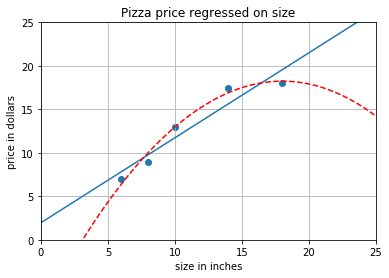

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x_train=[[6],[8],[10],[14],[18]]
y_train=[[7],[9],[13],[17.5],[18]]
x_test=[[6],
        [8],
        [11],
        [16]]
y_test=[[8],[12],[15],[18]]

regressor=LinearRegression()
regressor.fit(x_train,y_train)
xx=np.linspace(0,26,100) #obtain 100 points.
yy=regressor.predict(xx.reshape(xx.shape[0],1))
plt.plot(xx,yy)

quadra_feat=PolynomialFeatures(degree=2)
x_train_quadra=quadra_feat.fit_transform(x_train)
x_test_quadra=quadra_feat.transform(x_test)

quadra_reg=LinearRegression()
quadra_reg.fit(x_train_quadra,y_train)
xx_quadra=quadra_feat.transform(xx.reshape(xx.shape[0],1))

plt.plot(xx,quadra_reg.predict(xx_quadra),c='r',linestyle='--')
plt.title('Pizza price regressed on size')
plt.xlabel("size in inches")
plt.ylabel("price in dollars")
plt.axis([0,25,0,25])
plt.grid(True)
plt.scatter(x_train,y_train)

print(x_train)
print(x_train_quadra)
print(x_test)
print(x_test_quadra)

print("quadratic regression r-squared: %f"%(quadra_reg.score(x_test_quadra,y_test)))
print("simple linear regresion r-squared: %f"%(regressor.score(x_test,y_test)))

In [65]:
import pandas as pd

df=pd.read_csv('./winequality-red.csv',sep=';')
df.descibe()

FileNotFoundError: File b'./winequality-red.csv' does not exist

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['alcohol'],df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('alcohol against quality')


NameError: name 'df' is not defined

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('./winequality-red.csv',sep=';')
x=df[list(df.columns)[:-1]] #choose all the columns except the last column.
y=df['quality']
x_train,x_test,y_train,y_test=train_test_split(x,y)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
predictions=regressor.predict(x_test)
print('r-squared: %.3f'%(regressor.score(x_test,y_test)))


ModuleNotFoundError: No module named 'sklarn'

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

df=pd.read_csv('./winequality-red.csv',sep=';')
x=df[list(df.columns)[:-1]]
y=df['quality']
regressor=LinearRegression()
scores=cross_val_score(regressor,x,y,cv=5) #5 fold-cross-validation.
print(scores)
print(mean(scores))

In [5]:
import numpy as np

from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data=load_boston()
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target)
x_scaler=StandardScaler()
y_scaler=StandardScaler()
x_train=x_scaler.fit_transform(x_train)
y_train=y_scaler.fit_transform(y_train.reshape(-1,1))
x_test=x_scaler.transform(x_test)
y_test=y_scaler.transform(y_test.reshape(-1,1))

regressor=SGDRegressor(loss='squared_loss')
scores=cross_val_score(regressor,x_train,y_train,cv=5)

print("cross validation r-squared scores: %s"%(scores))
print("average cross validation rsquared score: %s"%(np.mean(scores)))
regressor.fit(x_train,y_train)
print("test set r-squared score: %s"%(regressor.score(x_test,y_test)))


cross validation r-squared scores: [0.79926352 0.60638768 0.773744   0.6041972  0.84709774]
average cross validation rsquared score: 0.7261380274795982
test set r-squared score: 0.66610837409008


/home/stevenxu/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/stevenxu/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/stevenxu/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/stevenxu/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [7]:
data['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
type(data)

sklearn.utils.Bunch

In [13]:
x_train

array([[-0.39336754, -0.49042767, -0.34908789, ...,  1.14697342,
         0.39425783, -0.0259545 ],
       [-0.34339665,  0.40275871, -1.02290402, ..., -2.6235065 ,
         0.36171341, -1.03740641],
       [-0.10972764, -0.49042767,  1.05139269, ...,  0.81288026,
         0.39676124, -0.29389807],
       ...,
       [ 1.27120284, -0.49042767,  1.05139269, ...,  0.81288026,
        -3.79635284,  1.66587768],
       [-0.388733  , -0.49042767,  2.46655336, ...,  0.76515267,
        -0.13516038,  1.60695815],
       [-0.3405992 , -0.49042767, -0.41074427, ...,  1.19470101,
         0.25635222, -0.31634361]])

In [19]:
all(y_train.reshape(-1,1)==y_train)

True

In [23]:
np.shape(y_train)

(379, 1)

In [24]:
np.shape(y_train.reshape(-1,1))

(379, 1)

Chapter 6: Logistic Regression

In [27]:
import pandas as pd
df=pd.read_csv('./SMSSpamCollection',delimiter='\t',header=None) #a brief syntax of file path.
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [28]:
print("num of the spam message: %d"%(df[df[0]=='spam'][0].count()))
print("num of the ham message: %d"%(df[df[0]=='ham'][0].count()))

num of the spam message: 747
num of the ham message: 4825


In [32]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score

x=df[1].values
y=df[0].values
x_train_raw,x_test_raw,y_train,y_test=train_test_split(x,y)

vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train_raw)
x_test=vectorizer.transform(x_test_raw)

classifier=LogisticRegression()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
for i,prediction in enumerate(predictions):
    print("prediction: %s, message: %s"%(prediction,x_test_raw[i]))


prediction: ham, message: U should make a fb list
prediction: ham, message: happened here while you were adventuring
prediction: ham, message: Lol no. Just trying to make your day a little more interesting
prediction: ham, message: Get me out of this dump heap. My mom decided to come to lowes. BORING.
prediction: ham, message: How come guoyang go n tell her? Then u told her?
prediction: ham, message: Cos daddy arranging time c wat time fetch ü mah...
prediction: ham, message:  gonna let me know cos comes bak from holiday that day.  is coming. Don't4get2text me  number. 
prediction: ham, message: Ü log off 4 wat. It's sdryb8i
prediction: ham, message: Hi. Wk been ok - on hols now! Yes on for a bit of a run. Forgot that i have hairdressers appointment at four so need to get home n shower beforehand. Does that cause prob for u?"
prediction: ham, message: Ay wana meet on sat?ü wkg on sat?
prediction: ham, message: Ok i found dis pierre cardin one which looks normal costs 20 its on sale.
pr

In [45]:
df[0]

0        ham
1        ham
2       spam
3        ham
4        ham
5       spam
6        ham
7        ham
8       spam
9       spam
10       ham
11      spam
12      spam
13       ham
14       ham
15      spam
16       ham
17       ham
18       ham
19      spam
20       ham
21       ham
22       ham
23       ham
24       ham
25       ham
26       ham
27       ham
28       ham
29       ham
        ... 
5542     ham
5543     ham
5544     ham
5545     ham
5546     ham
5547    spam
5548     ham
5549     ham
5550     ham
5551     ham
5552     ham
5553     ham
5554     ham
5555     ham
5556     ham
5557     ham
5558     ham
5559     ham
5560     ham
5561     ham
5562     ham
5563     ham
5564     ham
5565     ham
5566    spam
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: 0, Length: 5572, dtype: object

[[4 1]
 [2 3]]


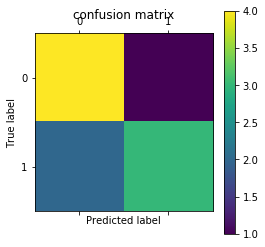

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test=[0,0,0,0,0,1,1,1,1,1]
y_pred=[0,1,0,0,0,0,0,1,1,1]
con_mat=confusion_matrix(y_test,y_pred)
print(con_mat)

plt.matshow(con_mat)
plt.title("confusion matrix")
plt.colorbar()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import roc_curve,auc

df=pd.read_csv('./sms.csv') #???file?
x_train_raw,x_test_raw,y_train,y_test=train_test_split(df['message'],df['label'],random_state=11)

vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train_raw)
x_test=vectorizer.transform(x_test_raw)

classifier=LogisticRegression()
classifier.fit(x_train,y_train)
scores=cross_val_score(classsifier,x_train,y_train,cv=5)
print("accuracy: %s"%(scores))
print("mean accuracy: %f"%(np.mean(scores)))


FileNotFoundError: File b'./sms.csv' does not exist

In [47]:
predictions=classifier.predict_proba(x_test)
false_positive_rate,recall,thresholds=roc_curve(y_test,predictions[:,1])
roc_auc=auc(false_positive_rate,recall)
plt.title("receiver operating characteristic")
plt.plot(false_positive_rate,recall,'b',label='AUC=%.2f'%(roc_auc)) #advanced method for labels.
plt.legend(loc='lower right')
plt.plot([0,],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('recall')
plt.xlabel('fall out')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [10, 1393]

In [120]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score

pipeline=Pipeline([
    ('vect',TfidfVectorizer(stop_words='english')),
    ('clf',LogisticRegression())
])
parameters={
    'vect__max_df':(0.25,0.5,0.75),
    'vect__stop_words':('english',None),
    'vect__max_features':(2500,5000,10000,None),
    'vect__ngram_range':((1,1),(1,2)),
    "vect__use_idf":(True,False),
    'vect__norm':('l1','l2'),
    'clf__penalty':('l1','l2'),
    'clf__C':(0.01,0.1,1,10)
}

df=pd.read_csv('./SMSSpamCollection',delimiter='\t',header=None)
x=df[1].values
y=df[0].values
label_encoder=LabelEncoder()
#using fit_transform() for training set,transform() for test set.
y=label_encoder.fit_transform(y)
x_train,x_test,y_train,y_test=train_test_split(x,y)

grid_search=GridSearchCV(estimator=pipeline,param_grid=parameters,n_jobs=-1,
                        verbose=1,scoring='accuracy',cv=3)
grid_search.fit(x_train,y_train)

print('best score: %.3f'%(grid_search.best_score_))
print('best parameter set:')
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()): #for every key in a dict.
    print('\t%s: %r'%(param_name,best_parameters[param_name])) #'%r' is almighty.
    predictions=grid_search.predict(x_test)
    print("accuracy: %f"%(accuracy_score(y_test,predictions)))
    print("precision: %f"%(precision_score(y_test,predictions)))
    print("recall: %f"%(recall_score(y_test,predictions)))

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 2428 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed:  1.2min finished


best score: 0.982
best parameter set:
	clf__C: 10
accuracy: 0.984925
precision: 0.994318
recall: 0.897436
	clf__penalty: 'l2'
accuracy: 0.984925
precision: 0.994318
recall: 0.897436
	vect__max_df: 0.5
accuracy: 0.984925
precision: 0.994318
recall: 0.897436
	vect__max_features: 5000
accuracy: 0.984925
precision: 0.994318
recall: 0.897436
	vect__ngram_range: (1, 2)
accuracy: 0.984925
precision: 0.994318
recall: 0.897436
	vect__norm: 'l2'
accuracy: 0.984925
precision: 0.994318
recall: 0.897436
	vect__stop_words: None
accuracy: 0.984925
precision: 0.994318
recall: 0.897436
	vect__use_idf: True
accuracy: 0.984925
precision: 0.994318
recall: 0.897436


In [ ]:
import pandas as pd

df=pd.read_csv('./train.tsv',header=0,delimiter='\t')
print(df.count())
print(df.head())
print(df['Phrase'].head())
print(df['Sentiment'].describe())
print(df['Sentiment'].value_counts())
print(df['Sentiment'].value_counts()/df['Sentiment'].count())


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.pipeline import Pipeline

df=pd.read_csv('./train.tsv',header=0,delimiter='\t')
x,y=df['Phrase'],df['Sentiment'].as_matrix()
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.5)
grid_search=main(x_train,y_train) ####
pipeline=Pipeline([
    ('vect',TfidfVectorizer),
    ('clf',LogisticRegression())
])
parameters={
    'vect__max_df':(.25,.5),
    'vect__ngram_range':((1,1),(1,2)),
    'vect__use_idf':(True,False),
    'clf__C':(.1,1,10)
}
grid_search=GridSearchCV(pipeline,parameters,n_jobs=-1,verbose=1,scoring='accuracy')
grid_search.fit(x_train,y_train)
print("best score: %s"%(grid_search.best_score_))
print("best paprameter set:")
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r"%(param_name,best_parameters[param_name]))

In [77]:
predictions=grid_search.predict(x_test)
print("accuracy: %f"%(accuracy_score(y_test,predictions)))
print("confusion matrix: %r"%(confusion_matrix(y_test,predictions)))
print("classification report:")
print(classification_report(y_test,predictions))

In [80]:
import numpy as np
from sklearn.metrics import hamming_loss,jaccard_similarity_score

print(hamming_loss(np.array([[0,1],[1,1]]),np.array([[0,1],[1,1]])))

0.0


In [81]:
print(hamming_loss(np.array([[0,1],[1,1]]),np.array([[1,1],[1,1]])))

0.25


In [84]:
print(hamming_loss(np.array([[0,1],[1,1]]),np.array([[1,1],[0,1]])))

0.5


In [85]:
print(jaccard_similarity_score(np.array([[0,1],[1,1]]),np.array([[0,1],[1,1]])))

1.0


/home/stevenxu/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [87]:
print(jaccard_similarity_score(np.array([[0,1],[1,1]]),np.array([[1,1],[1,1]])))

0.75


In [88]:
print(jaccard_similarity_score(np.array([[0,1],[1,1]]),np.array([[1,1],[0,1]])))

0.5


Chapter 7: Naive Bayes

/home/stevenxu/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/stevenxu/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

/home/stevenxu/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


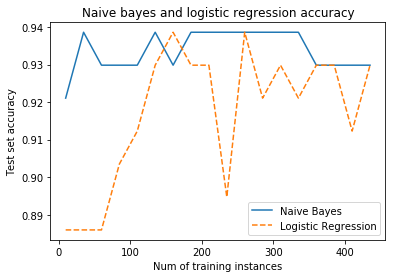

In [90]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

x,y=load_breast_cancer(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=31)

lr=LogisticRegression()
nb=GaussianNB()

lr_score=[]
nb_score=[]

train_sizes=range(10,len(x_train),25)

for train_size in train_sizes:
    x_slice,_,y_slice,_=train_test_split(x_train,y_train,train_size=train_size,stratify=y_train,
                                        random_state=31) 
    #'stratify=y_train' stratify training and test set as y_train.
    nb.fit(x_slice,y_slice)
    nb_score.append(nb.score(x_test,y_test))
    lr.fit(x_slice,y_slice)
    lr_score.append(lr.score(x_test,y_test))
    
plt.plot(train_sizes,nb_score,label='Naive Bayes')
plt.plot(train_sizes,lr_score,linestyle='--',label="Logistic Regression")
plt.title("Naive bayes and logistic regression accuracy")
plt.xlabel("Num of training instances")
plt.ylabel("Test set accuracy")
plt.legend()

/home/stevenxu/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/stevenxu/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

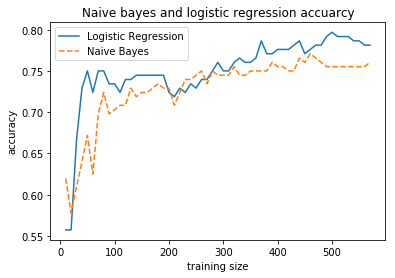

In [102]:
df=pd.read_csv('./pima-indians-diabetes.csv',header=None)

y=df[8]
x=df[[1,2,3,4,5,6,7]]
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=11)

lr=LogisticRegression()
nb=GaussianNB()

lr_scores=[]
nb_scores=[]

train_sizes=range(10,len(x_train),10)
for train_size in train_sizes:
    x_slice,_,y_slice,_=train_test_split(x_train,y_train,train_size=train_size,stratify=y_train,
                                        random_state=11)
    nb.fit(x_slice,y_slice)
    nb_scores.append(nb.score(x_test,y_test))
    lr.fit(x_slice,y_slice)
    lr_scores.append(lr.score(x_test,y_test))

plt.plot(train_sizes,lr_scores,label='Logistic Regression')
plt.plot(train_sizes,nb_scores,label='Naive Bayes',linestyle='--')
plt.title("Naive bayes and logistic regression accuarcy")
plt.xlabel("training size")
plt.ylabel("accuracy")
plt.legend()

Chapter 8: Decision Tree

In [119]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

df=pd.read_csv('./ad.data',header=None)

explanatory_variable_columns=set(df.columns.values) #turn column names of df into array.
explanatory_variable_columns.remove(len(df.columns.values)-1) #remove the last element.
response_variable_column=df[len(df.columns.values)-1]

y=[1 if e=='ad.' else 0 for e in response_variable_column] #advanced method of list.
x=df[list(explanatory_variable_columns)].copy()
x.replace(to_replace=' *?',value=-1,regex=True,inplace=True) #using -1 to replace ' *?'
x_train,x_test,y_train,y_test=train_test_split(x,y)

pipeline=Pipeline([
    ('clf',DecisionTreeClassifier(criterion='entropy'))
])
parameters={
    'clf__max_depth':(150,155,160),
    'clf__min_samples_split':(2,3),
    'clf__min_samples_leaf':(1,2,3)
}
grid_search=GridSearchCV(pipeline,parameters,n_jobs=-1,verbose=1,scoring='f1')
grid_search.fit(x_train,y_train)

best_parameters=grid_search.best_estimator_.get_params()
print("best score: %.3f"%(grid_search.best_score_))
print("best parameter set:")
for param_name in sorted(parameters.keys()):
    print("\t%s: %r"%(param_name,parameters[param_name]))

predictions=grid_search.predict(x_test)
print(classification_report(y_test,predictions))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s


best score: 0.914
best parameter set:
	clf__max_depth: (150, 155, 160)
	clf__min_samples_leaf: (1, 2, 3)
	clf__min_samples_split: (2, 3)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       715
           1       0.92      0.78      0.85       105

    accuracy                           0.96       820
   macro avg       0.94      0.89      0.91       820
weighted avg       0.96      0.96      0.96       820



[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.5s finished


In [113]:
df.columns.values

array([   0,    1,    2, ..., 1556, 1557, 1558])

Chapter 9: Random Forest

In [122]:
import numpy as np

samples=np.random.randint(1,100,10)
print("the original sample: %s"%(samples))
print("sample mean: %.2f"%(np.mean(samples)))

resamples=[np.random.choice(samples,samples.shape) for i in range(100)] #draw a 10-element sample 100 times.
print("num of bootstrap is: %s"%(len(resamples)))
print("example resample: %s"%(resamples[0]))

resample_means=np.array([resample.mean() for resample in resamples])
print("mean of resamples: %s"%(resample_means.mean()))


the original sample: [60 43 60 54 67 58 70  3 77 89]
sample mean: 58.10
num of bootstrap is: 100
example resample: [43 67 43 89 77 60 70 60 54 67]
mean of resamples: 56.431


In [124]:
resamples

[array([43, 67, 43, 89, 77, 60, 70, 60, 54, 67]),
 array([67,  3, 58, 89, 89, 54, 58, 43, 89, 67]),
 array([89,  3, 77, 77, 67, 60,  3, 70, 43,  3]),
 array([77, 70, 60, 67, 60, 60, 70, 54, 54, 58]),
 array([43, 60, 60, 54, 67, 77, 89,  3, 77, 70]),
 array([70, 77, 60, 67, 67, 43, 58, 54, 77, 67]),
 array([89, 43, 60, 70, 43, 54, 89, 54, 67, 60]),
 array([54, 70,  3, 43, 43, 58, 77, 89, 70, 60]),
 array([67, 54, 77, 54, 67, 67, 89, 43, 54, 70]),
 array([89, 54, 54,  3, 54,  3,  3, 70, 70, 54]),
 array([60, 67, 67, 60, 60, 89, 77, 60, 58, 70]),
 array([89, 60,  3, 58, 70, 67, 43, 70, 60, 54]),
 array([43, 60, 67, 43, 54, 43, 77,  3, 77, 43]),
 array([ 3, 70, 70, 70, 89, 89,  3, 67, 58,  3]),
 array([77, 60, 70, 43, 58, 77,  3, 60, 60, 60]),
 array([58, 43, 67, 67, 70, 54, 43, 58, 67, 77]),
 array([60, 70, 54,  3, 60, 89,  3,  3, 58,  3]),
 array([70, 60, 89, 60, 89,  3, 89,  3, 60, 54]),
 array([54, 67, 89, 67, 77,  3,  3, 43, 54, 77]),
 array([89, 77, 58,  3, 58, 54, 67, 60, 54, 89]),


In [125]:
resample_means

array([63. , 61.7, 49.2, 63. , 60. , 64. , 62.9, 56.7, 64.2, 45.4, 66.8,
       57.4, 51. , 52.2, 56.8, 60.4, 40.3, 57.7, 53.4, 60.9, 45.7, 60.4,
       57.1, 59.2, 56.9, 56.1, 54.6, 61.2, 42.3, 57.9, 61.9, 62.3, 63.3,
       60.9, 65.7, 50.4, 53.3, 63. , 59.4, 56.4, 54. , 52.7, 54.9, 51.5,
       60.4, 59.9, 60.2, 60.6, 61.7, 42.3, 59.9, 69.4, 58.8, 32.6, 64.8,
       55.3, 57. , 55. , 37.1, 48.1, 51.8, 56.1, 46.9, 53.8, 58.1, 62.9,
       63.3, 39.9, 59.9, 57.1, 54.2, 68.9, 45.5, 54.9, 52.6, 64.2, 55.1,
       57.4, 58.7, 56.9, 67.2, 59. , 48. , 46.4, 61.3, 58.3, 55.3, 54.2,
       47. , 63.5, 54.3, 63.8, 55.5, 65.8, 49.4, 60.3, 58.9, 47.1, 64.9,
       53.5])

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x,y=make_classification(n_samples=1000,n_features=100,
                      n_informative=20,n_clusters_per_class=2,random_state=11) #creating a classification rule.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11)

clf=DecisionTreeClassifier(random_state=11)
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.73      0.66      0.69       127
           1       0.68      0.75      0.71       123

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.71      0.70      0.70       250



In [131]:
clf=RandomForestClassifier(n_estimators=10,random_state=11) #creating a 10-tree forest with seed satate 11.
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.83      0.79       127
           1       0.80      0.70      0.75       123

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250



In [135]:
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

x,y=make_classification(n_samples=1000,n_features=50,n_informative=30,
                        n_clusters_per_class=3,random_state=11)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11)

clf=DecisionTreeClassifier(random_state=11)
clf.fit(x_train,y_train)
print("decision tree accuracy: %.3f"%(clf.score(x_test,y_test)))


decision tree accuracy: 0.688


Text(0.5,1,'ensemble accuracy')

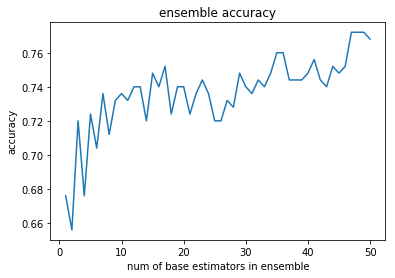

In [141]:
clf=AdaBoostClassifier(n_estimators=50,random_state=11)
clf.fit(x_train,y_train)
accuracies=[]
accuracies.append(clf.score(x_test,y_test))

plt.plot(range(1,51),[accuracy for accuracy in clf.staged_score(x_test,y_test)])
plt.xlabel("num of base estimators in ensemble")
plt.ylabel("accuracy")
plt.title("ensemble accuracy")

In [144]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.base import clone,BaseEstimator,TransformerMixin,ClassifierMixin

class StackingClassifier(BaseEstimator,ClassifierMixin,TransformerMixin): #heritage of classes.
    def __init__(self,classifiers):
        self.classifiers=classifiers
        self.meta_classifier=DecisionTreeClassifier()
    
    def fit(self,x,y):
        for clf in self.classifiers:
            clf.fit(x,y)
        self.meta_classifier.fit(self._get_meta_features(x),y)
        return self
    
    def _get_meta_features(self,x):
        probs=np.asarray([clf.predict_proba(x) for clf in self.classifiers]) #turn list into array
        return np.concatenate(probs,axis=1) #combine lelements vertivally.
    
    def predict(self,x):
        return self.meta_classifier.predict(self._get_meta_features(x))
    
    def predict_proba(self,x):
        return self.meta_classifier.predict_proba(self._get_meta_features(x))
    
x,y=make_classification(n_samples=1000,n_features=50,n_informative=30,
                       n_clusters_per_class=3,random_state=11)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11)

lr=LogisticRegression()
lr.fit(x_train,y_train)
print("logistic regrssion accuracy: %.3f"%(lr.score(x_test,y_test)))

knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
print('KNN accuracy: %.3f'%(knn_clf.score(x_test,y_test)))

logistic regrssion accuracy: 0.816
KNN accuracy: 0.836


In [145]:
base_classifiers=[lr,knn_clf]
stacking_clf=StackingClassifier(base_classifiers)
stacking_clf.fit(x_train,y_train)
print("stacking classifier accuracy: %.3f"%(stacking_clf.score(x_test,y_test)))

stacking classifier accuracy: 0.856


In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report,f1_score

categories=['rec.sport.hockey','rec.sport.baseball','rec.autos']
newsgroups_train=fetch_20newsgroups(subset='train',
                                    categories=categories,remove=('headers','footers','quotes'))
newsgroups_test=fetch_20newsgroups(subset='test',categories=categories,
                                remove=('headers','footers','quotes'))

vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(newsgroups_train.data)
x_test=vectorizer.transform(newsgroups_test.data)
clf=Perceptron(random_state=11)
clf.fit(x_train,newsgroups_train.target)
predictions=clf.predict(x_test)

print(classification_report(newsgroups_test.target,predictions))

KeyboardInterrupt: 

Chapter 11: Support Vector Machine

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.datasets import fetch_mldata

mnist=fetch_mldata('MNIST original',data_home='data/mnist')

counter=1
for i in range(1,4):
    for j in range(1,6):
        plt.subplot(3,5,counter)
        plt.imshow(mnist.data[(i-1)*800+j].reshape(28,28),cmap=cm.Greys_r)
        plt.axis('off')
        counter+=1

ImportError: cannot import name 'fetch_mldata'

In [7]:
import numpy as np

np.eye(4,4).reshape((2,8))

array([[1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1.]])

In [9]:
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

if __name__=='__main__':
    x,y=mnist.data,mnist.target
    x=2*x/255.0-1
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11)
    
    pipeline=Pipeline([
        ('clf',SVC(kernel='rbf',gamma=.01,C=100))
    ])
    
    prarameters={
        'clf__gamma':(.01,.01,.1,.3,1),
        'clf__C':(.1,.1,1,3,10,30)
    }
    
    grid_search=GridSearchCV(pipeline,parameters,n+jobs=2,verbose=1,scoring='accuracy')
    grid_search.fit(x_train[:10000],y_train[:10000])
    print("best score: %.3f"%(grid_search.best_score_))
    print("best parameter set:")
    best_parameters=grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r"%(param_name,parameters[param_name]))
    predictions=grid_search.predict(x_test)
    print(classification_report(y_test,predictions))

In [ ]:
import os
import numpy as np

from sklearn.pipeline import Pipeline
from sklarn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from PIL import Image

x=[]
y=[]

for path,subdirs,files in os.walk('English/Img/GoodImg/Bmp'):
    for filename in files:
        f=os.path.join(path,filename)
        target=filename[3:filename.index('-')]
        img=Image.open(f).convert('L').resize((30,30),resample=Image.LANCZOS)
        x.append(np.array(img).reshape(900,-1))
        y.append(target)
x=np.array(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_sate=11)
pipeline=Pipeline([
    ('clf',SVC(kernel='rbf',gamma=.01,C=100))
])
parameters={
    'clf__gamma':(.01,.03,.1,.3,1),
    'clf__C':(.1,.3,1,3,10,30)
}

if __name__=='__main__':
    grid_search=GridSearchCV(pipeline,parameters,n_jobs=3,
                            verbose=1,scoring='accuracy')
    grid_search.fit(x_train,y_train)
    print("best score: %.3f"%(grid_search.best_score_))
    print("best parameter set:")
    best_parameters=grid_seach.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r"%(param_name,best_parameters[param_name]))
    predictions=grid_search.predict(x_test)
    print(classification_report(y_test,predictions))
    

Chapter 12: Neural Network

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

x=[
    [0,0],
    [0,1],
    [1,0],
    [1,1]
]
y=[0,1,1,0]
clf=MLPClassifier(solver='lbfgs',activation='logistic',hidden_layer_sizes=(2,),random_state=20)
clf.fit(x,y)

predictions=clf.predict(x)
print("accuracy: %.3f"%(clf.score(x,y)))
for i,p in enumerate(predictions):
    print("true label: %d, predicted label: %d"%(y[i],p))
    

accuracy: 1.000
true label: 0, predicted label: 0
true label: 1, predicted label: 1
true label: 1, predicted label: 1
true label: 0, predicted label: 0


In [23]:
print("weights connecting the input layer and the hidden layer: \n%s"%(clf.coefs_[0]))
print("hidden layer bias weights: \n%s"%(clf.intercepts_[0]))
print("weights connecting the hidden layer and the output layer: \n%s"%(clf.coefs_[1]))
print("output layer bias weights: \n%s"%(clf.intercepts_[1]))

weights connecting the input layer and the hidden layer: 
[[6.11803862 6.35656379]
 [5.79147913 6.14551968]]
hidden layer bias weights: 
[-9.38637953 -2.77751695]
weights connecting the hidden layer and the output layer: 
[[-14.95481992]
 [ 14.53080978]]
output layer bias weights: 
[-7.22845344]


In [26]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

if __name__=='__main__':
    digits=load_digits()
    x=digits.data
    y=digits.target
    pipeline=Pipeline([
        ('ss',StandardScaler()),
        ('mlp',MLPClassifier(hidden_layer_sizes=(150,100),alpha=0.1,max_iter=300,random_state=20))
    ])
    print(cross_val_score(pipeline,x,y,n_jobs=-1,cv=3))

[0.95325543 0.96327212 0.93322204]


Chapter 13: K-Means

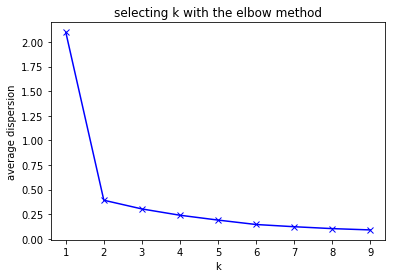

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

c1x=np.random.uniform(.5,1.5,(1,10)) #a unifrom distribution with size 1 by 10.
c1y=np.random.uniform(.5,1.5,(1,10)) 
c2x=np.random.uniform(3.5,4.5,(1,10))
c2y=np.random.uniform(3.5,4.5,(1,10))
x=np.hstack((c1x,c2x)) #double parenthses.
y=np.hstack((c1y,c2y))
X=np.vstack((x,y)).T

K=range(1,10)
mean_dispersion=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    mean_dispersion.append(
    sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0]
    )
plt.plot(K,mean_dispersion,'bx-')
plt.xlabel('k')
plt.ylabel('average dispersion')
plt.title('selecting k with the elbow method')
plt.show()

In [38]:
cdist(X,kmeans.cluster_centers_,'euclidean').shape

(20, 9)

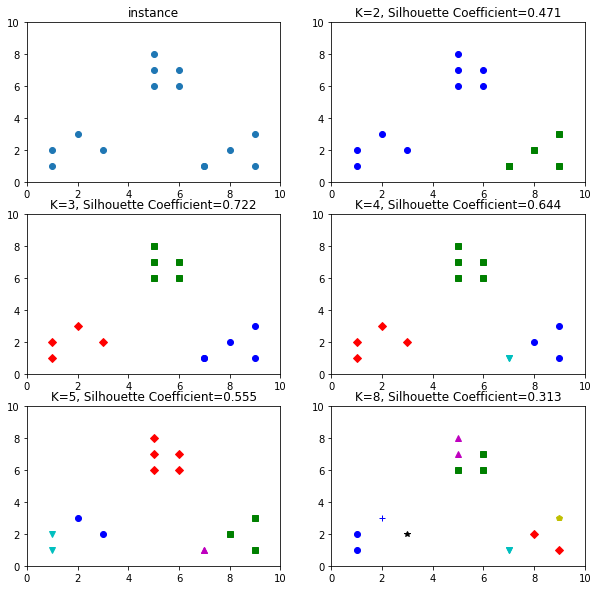

In [60]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics

plt.figure(figsize=(10,10)) #adjust the size of graph.
plt.subplot(321)
x1=np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2=np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])
X=np.vstack((x1,x2)).T

plt.xlim([0,10])
plt.ylim([0,10])
plt.title('instance')
plt.scatter(x1,x2)
colors=['b','g','r','c','m','y','k','b']
markers=['o','s','D','v','^','p','*','+']
tests=[2,3,4,5,8]
subplot_counter=1
for t in tests:
    subplot_counter+=1
    plt.subplot(3,2,subplot_counter)
    kmeans_model=KMeans(n_clusters=t).fit(X)
    for i,l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i],x2[i],color=colors[l],marker=markers[l],ls='None')
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("K=%s, Silhouette Coefficient=%.3f"%(t,metrics.silhouette_score(X,kmeans_model.labels_,
                                                                              metric='euclidean')))
plt.show()

In [58]:
kmeans_model.labels_

array([3, 0, 0, 3, 1, 4, 1, 4, 4, 5, 2, 7, 5, 6], dtype=int32)

In [63]:
np.zeros((2,3,9))

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [74]:
q=np.ones((2,5,8))

In [75]:
q[1,2]=[1,2,3,4,5,6,7,8] #change the 2nd row of 1st array into another number.

In [76]:
q

array([[[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 2., 3., 4., 5., 6., 7., 8.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]]])

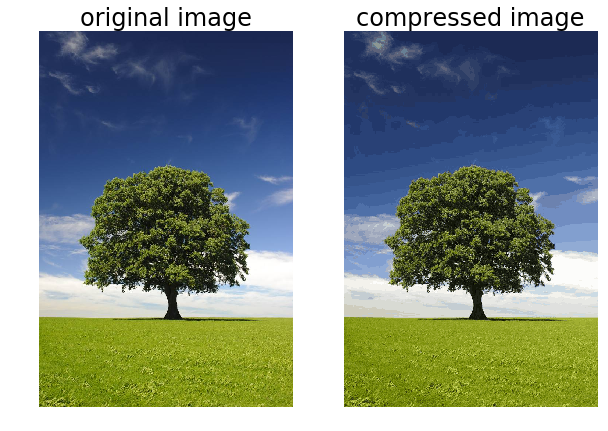

In [85]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image

original_img=np.array(Image.open('tree.jpg'),dtype=np.float64)/255
width,height,depth=tuple(original_img.shape) #a pic is 3-D.
image_flattened=np.reshape(original_img,(width*height,depth))

image_array_sample=shuffle(image_flattened,random_state=0)[:1000]
estimator=KMeans(n_clusters=64,random_state=0) #set 64 clusters for k-means.
estimator.fit(image_array_sample)

cluster_assignments=estimator.predict(image_flattened) #predict a class for each row of image_flattened.

compressed_palette=estimator.cluster_centers_ #64 cluster centers with 3-D for each.
compressed_img=np.zeros((width,height,compressed_palette.shape[1])) ##
label_idx=0
for i in range(width):
    for j in range(height):
        compressed_img[i,j]=compressed_palette[cluster_assignments[label_idx]]
        label_idx+=1
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title("original image",fontsize=24)
plt.imshow(original_img)
plt.axis('off')
plt.subplot(122)
plt.title("compressed image",fontsize=24)
plt.imshow(compressed_img)
plt.axis('off')
plt.show()

In [88]:
estimator.cluster_centers_.shape

(64, 3)

In [90]:
estimator.predict(image_flattened).shape

(706893,)

In [92]:
image_flattened.shape

(706893, 3)

In [95]:
cluster_assignments

array([36, 36, 36, ..., 31, 31, 31], dtype=int32)

In [96]:
import glob
import numpy as np
import mahotas as mh
from mahotas.features import surf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.cluster import MiniBatchKMeans

all_instance_filenames=[]
all_instance_targets=[]

for f in glob.glob('cats-and-doogs-img/*.jpg'):
    target=1 if 'cat' in os.path.split(f)[1] else 0
    all_instance_filenames.append(f)
    all_instance_targets.append(target)

surf_features=[]
for f in all_instance_filenames:
    image=mh.imread(f,as_grey=True)
    surf_features.append(surf.surf(image)[:,5:])
    
train_len=int(len(all_insatnce_filenames)*60)
x_train_surf_features=np.concatenate(surf_features[:train_len])
x_test_surf_features=np.concatenate(surf_features[train_len:])
y_train=all_instance_targets[:train_len]
y_test=all_instance_targets[train_len:]

n_clusters=30
estimator=MiniBatchKMeans(n_clusters=n_clusters)
estimator.fit_transform(x_train_surf_features)

x_train=[]
for instance in surf_features[:train_len]:
    clusters=estimator.predict(instance)
    features=np.bincount(clusters)
    if len(features)<n_clusters:
        features=np.append(features.np.zeros((1,n_clusters-len(features))))
    x_train.append(features)

x_test=[]
for instance in surf_features[train_len:]:
    clusters=estimator.predict(instance)
    features=np.bincount(clusters)
    if len(features)<n_clusters:
        features=np.append(features,np.zeros((1,n_clusters-len(features))))
    x_test.append(features)
    
clf=LogisticRegression(C=.001,penalty='l2')
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)
print(classification_report(y_test,predictions))

Chapter 14: Principal Component Analysis

In [100]:
import numpy as np

x=np.array([
    [2,0,-1.4],
    [2.2,.2,-1.5],
    [2.4,.1,-1],
    [1.9,0,-1.2]
])
covariance=np.cov(x)
print(covariance)

[[2.92       3.16       2.95       2.67      ]
 [3.16       3.43       3.175      2.885     ]
 [2.95       3.175      3.01       2.705     ]
 [2.67       2.885      2.705      2.44333333]]


In [102]:
w,vt=np.linalg.eig(covariance)
print(w)
print(vt)

[1.17641614e+01 3.91719379e-02 2.04612892e-17 1.01302508e-15]
[[-0.49815042  0.13157537 -0.09803055  0.70238468]
 [-0.53864393  0.65446203 -0.28295287 -0.52941871]
 [-0.50403402 -0.73759564 -0.3885654  -0.38327987]
 [-0.45569571 -0.10158761  0.87140382  0.28190093]]


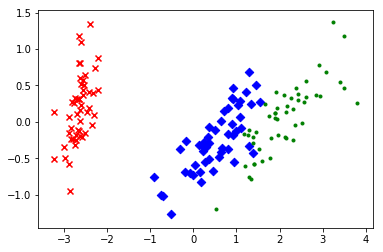

In [105]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

data=load_iris()
y=data.target
x=data.data
pca=PCA(n_components=2)
reduced_x=pca.fit_transform(x)

red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]
for i in range(len(reduced_x)):
    if y[i]==0:
        red_x.append(reduced_x[i,0])
        red_y.append(reduced_x[i,1])
    elif y[i]==1:
        blue_x.append(reduced_x[i,0])
        blue_y.append(reduced_x[i,1])
    else:
        green_x.append(reduced_x[i,0])
        green_y.append(reduced_x[i,1])

plt.scatter(red_x,red_y,c='r',marker='x')
plt.scatter(blue_x,blue_y,c='b',marker='D')
plt.scatter(green_x,green_y,c='g',marker='.')
plt.show()

In [122]:
import os
import numpy as np

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from PIL import Image

x=[]
y=[]

for dirpath,_,filenames in os.walk('att-faces/orl_faces'):
    for file in filenames:
        if filenames[-3:]=='pgm':
            img=Image.open(os.path.join(dirpath,filename)).convert('L')
            arr=np.array(img).reshape(10304).astype('float32')/255
            x.append(arr)
            y.append(dirpath)
x=scale(x)

x_train,x_test,y_train,y_test=train_test_split(x,y)
pca=PCA(n_components=150)

x_train_reduced=pca.fit_transform(x_train)
x_test_reduced=pca.transfrom(x_test)
print(x_train.shape)
print(x_train_reduced.shape)
classifier=LogisticRegression()
accuracies=cross_val_score(classifier,x_train_reduced,y_train)
print("cross validation accuracy: %s"%(np.mean(accuracies)))
classifier.fit(x_train_redduced,y_train)
predictions=classifier.predict(x_test_reduced)
print(classification_report(y_test,predictions))


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required by the scale function.